
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1DCHPvDTzVKK_gp1n6tqV5q8f3CH-yups?usp=sharing)



# Companion Notebook to `playing-with-coronavirus-data` 
- [GitHub Repo](https://github.com/jirvingphd/playing-with-coronavirus-data)
- James M. Irivng, Ph.D.
- james.irving.phd@gmail.com

In [7]:
# !pip install fsds
# !pip install pmdarima

from fsds.imports import *

In [8]:
import os,glob,sys
import re

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

import cufflinks as cf
cf.go_offline()
cf.set_config_file(sharing='public',theme='solar',offline=True)

plt.rcParams['figure.figsize'] = (12,6)

In [35]:
pd.set_option('display.max_columns',0)

In [36]:
# from google.colab import drive
# drive.mount('/gdrive')

In [37]:
# import os

# ## Setting Folder and Changing Directory
# folder = r'/gdrive/MyDrive/Colab Notebooks - Personal'
# os.chdir(folder)
# # sorted(os.listdir())

### Clone GitHub Repo with Data Functions/Classes

In [38]:
# # Cloning Repository
# url = 'https://github.com/jirvingphd/playing-with-coronavirus-data/'
# !git clone {url}

In [39]:
# os.chdir('playing-with-coronavirus-data/')
# !git pull
# sorted(os.listdir())

In [1]:
## Appending folder with functions
%load_ext autoreload 
%autoreload 2
import sys
sys.path.append('.')

import functions as fn
help(fn)

fsds v0.3.2 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


Help on module functions:

NAME
    functions

CLASSES
    builtins.object
        BaselineData
            CoronaData
            CovidTrackingProject
    
    class BaselineData(builtins.object)
     |  #Make a base class
     |  
     |  Methods defined here:
     |  
     |  __repr__(self)
     |      Return repr(self).
     |  
     |  __str__(self)
     |      Return str(self).
     |  
     |  get_group_ts(self, group_name, group_col='state', ts_col=None, df=None, freq='D', agg_func='sum')
     |      Take df_us and extracts state's data as then Freq/Aggregation provided
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  df
    
    class CoronaData(BaselineData)
     |  CoronaData(data_dir='New Data/', run_workfl

In [41]:
covid = fn.CovidTrackingProject(verbose=True)
covid

[i] DOWNLOADING DATASETS FROM COVID TRACKING PROJECT
	https://covidtracking.com/data
	- File saved as: "New Data/states_metadata.csv"
ERROR
	- File saved as: "New Data/us.csv"
	- File saved as: "New Data/states.csv"
states


------------------------------------------------------------
[i] CovidTrackingProject Contents:
------------------------------------------------------------

METHODS:
	download_state_daily
	download_state_meta
	download_us_daily
	get_csv_save_load
	get_df
	get_group_ts
	help

ATTRIBUTES
	base_folder
	base_url
	columns
	columns_us
	df
	df_states
	df_us
	urls

In [45]:
# covid.df_states

## Updating Workflow Due to CovidTracking Project API shutting down

- Reverting to using Kaggle dataset. 


In [14]:
%load_ext autoreload 
%autoreload 2
import coronavirus_functions as fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
corona = fn.CoronaData(verbose=True,run_workflow=True)
corona

[i] DOWNLOADING DATA USING KAGGLE API
	https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
	- Downloaded dataset .zip and extracted to:"New Data/"
	- Extraction Complete.


,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


[i] There are 229 countries in the datatset
[i] Dates Covered:
	From 01-22-2020 to 05-29-2021


------------------------------------------------------------
[i] CovidTrackingProject Contents:
------------------------------------------------------------

METHODS:
	calculate_per_capita
	download_coronavirus_data
	get_and_clean_US
	get_data_fpath
	get_group_ts
	load_raw_df
	load_us_reference_info
	set_datetime_index

ATTRIBUTES
	STATES
	df
	df_us
	raw_df
	reference_data

In [22]:
## Original Raw Df at download
corona.raw_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [23]:
## Cleaned up df (entire world)
corona.df

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


In [46]:
## save us data
df = corona.df_us.copy()
df

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2021-05-25,Puerto Rico,US,138094.0,2483.0,0.0,PR,4.323958e-02,0.000777,0.0
2021-05-26,Puerto Rico,US,138217.0,2489.0,0.0,PR,4.327810e-02,0.000779,0.0
2021-05-27,Puerto Rico,US,138355.0,2495.0,0.0,PR,4.332131e-02,0.000781,0.0


In [54]:
## Get list of all states
state_list = sorted(df["state"].unique())
print(state_list[:5])
len(state_list) # + Peurto Rico and...?

['AK', 'AL', 'AR', 'AZ', 'CA']


52

In [61]:
state = 'MD'
cols_to_grab = ['Confirmed','Deaths','Recovered']

## Get df for curr state and resample, keeping the last point for each day
state_df = df.loc[df['state']==state]
state_df = state_df.resample('D').last()

## save each col into its own dict key
state_ts_dict = {}
for col in cols_to_grab:
    curr_ts = state_df[col].rename(f"{state}-{col}")
    state_ts_dict[col] = curr_ts
state_ts_dict

{'Confirmed': Date
 2020-03-06         3.0
 2020-03-07         3.0
 2020-03-08         1.0
 2020-03-09         1.0
 2020-03-10         8.0
                 ...   
 2021-05-25    458680.0
 2021-05-26    458878.0
 2021-05-27    459095.0
 2021-05-28    459343.0
 2021-05-29    459528.0
 Freq: D, Name: MD-Confirmed, Length: 450, dtype: float64,
 'Deaths': Date
 2020-03-06       0.0
 2020-03-07       0.0
 2020-03-08       0.0
 2020-03-09       0.0
 2020-03-10       0.0
                ...  
 2021-05-25    9029.0
 2021-05-26    9037.0
 2021-05-27    9581.0
 2021-05-28    9592.0
 2021-05-29    9599.0
 Freq: D, Name: MD-Deaths, Length: 450, dtype: float64,
 'Recovered': Date
 2020-03-06    0.0
 2020-03-07    0.0
 2020-03-08    0.0
 2020-03-09    0.0
 2020-03-10    0.0
              ... 
 2021-05-25    0.0
 2021-05-26    0.0
 2021-05-27    0.0
 2021-05-28    0.0
 2021-05-29    0.0
 Freq: D, Name: MD-Recovered, Length: 450, dtype: float64}

In [71]:
cols_to_grab = ['Confirmed','Deaths','Recovered']
state_data = {}
for state in state_list:

    ## Get df for curr state and resample, keeping the last point for each day
    state_df = df.loc[df['state']==state]
    state_df = state_df.resample('D').last()

    ## save each col into its own dict key
    state_ts_dict = {}
    for col in cols_to_grab:
        curr_ts = state_df[col].rename(f"{state}-{col}")
        state_ts_dict[col] = curr_ts
    state_data[state] = pd.DataFrame(state_ts_dict)

In [72]:
## pull out md confirmed
ts = state_data['MD']#['Confirmed']
ts

,Confirmed,Deaths,Recovered
Date,,,
2020-03-06,3.0,0.0,0.0
2020-03-07,3.0,0.0,0.0
2020-03-08,1.0,0.0,0.0
2020-03-09,1.0,0.0,0.0
2020-03-10,8.0,0.0,0.0
...,...,...,...
2021-05-25,458680.0,9029.0,0.0
2021-05-26,458878.0,9037.0,0.0
2021-05-27,459095.0,9581.0,0.0


> #### Using Code from `coronavirus-v3-WIP.ipynb`

<AxesSubplot:xlabel='Date'>

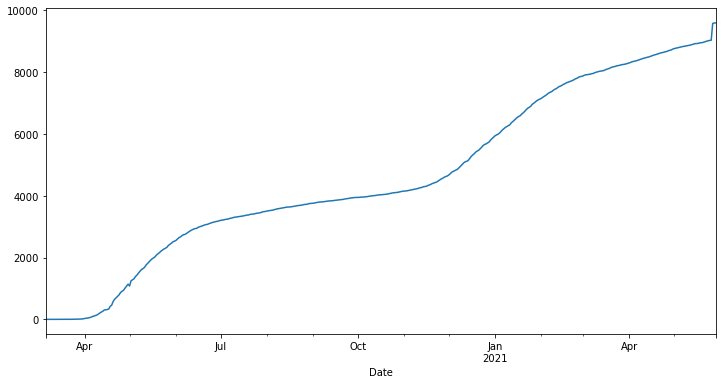

In [66]:
md['Deaths'].plot()

<AxesSubplot:xlabel='Date'>

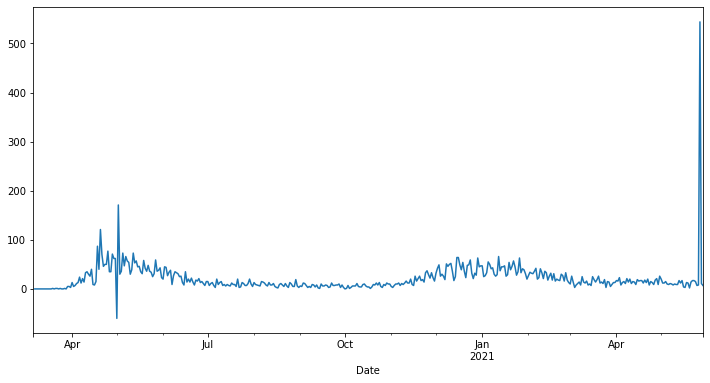

In [67]:
md['Deaths'].diff().plot()

### Checking Seasonal Decompose for Seasonality to Use

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sms
decomp = sms.tsa.seasonal_decompose(ts)
decomp.plot();

In [ ]:
decomp.seasonal.loc['01-01-21':].plot()

f

In [ ]:
# 

In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(ts,start_p=0,start_q=0,start_P=0,start_Q=0,m=7)
auto_model

In [ ]:
auto_model.summary()

In [ ]:
model = SARIMAX(ts,order=auto_model.order, 
                seasonal_order =auto_model.seasonal_order,
                enforce_invertibility=False,freq='D').fit()
model.summary()

In [ ]:
model.plot_diagnostics();

In [ ]:
##Getting forecast
forecast = model.get_forecast(steps=14)

forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean
forecast_df.columns = ['lower','upper','forecast']
forecast_df

In [ ]:
last_n_days = 60
fig,ax = plt.subplots(figsize=(12,5))
ts.iloc[-last_n_days:].plot(label='True Data')
forecast_df['forecast'].plot(ax=ax)
ax.fill_between(forecast_df.index,
                forecast_df['lower'], forecast_df['upper'],alpha=0.6)
ax.legend()
ax.set(title='Forecasted Hospitalizations (Current) for Maryland')
# ax.plot()

## NEXT: Functionize Forecasts

In [ ]:
from pmdarima import auto_arima

def get_ts(df,col,fill_val=np.nan,**kwargs):
    ts = df[col].fillna(value=fill_val)
    return ts



def get_best_model(ts,start_p=0,start_q=0,start_P=0,start_Q=0,m=7,
                   as_sarimax = True, **kwargs):
    
    auto_model = auto_arima(ts,start_p=start_p,
                            start_q=start_q,start_P=start_P,start_Q=start_Q,m=m,)
    print(f"[i] Best parameters found:")
    display(auto_model.summary())

    if as_sarimax:
        model = SARIMAX(ts,order=auto_model.order, 
                seasonal_order =auto_model.seasonal_order,
                enforce_invertibility=False,freq='D').fit()
        return model

    else:
        return auto_model

def get_forecast(model,steps=14):
    forecast = model.get_forecast(steps=steps)
    forecast_df = forecast.conf_int()
    forecast_df['Forecast'] = forecast.predicted_mean
    forecast_df.columns = ['lower','upper','forecast']
    return forecast_df

    
def plot_forecast(model,ts,last_n_days=60,future_steps=14):
    forecast_df = get_forecast(model,steps=future_steps)

    fig,ax = plt.subplots(figsize=(12,5))
    ts.iloc[-last_n_days:].plot(label='True Data')
    forecast_df['forecast'].plot(ax=ax)
    ax.fill_between(forecast_df.index,
                    forecast_df['lower'], forecast_df['upper'],alpha=0.6)
    ax.legend()
    ax.set(title=f'Forecasted {ts.name}')
    return fig,ax

In [ ]:
ts2 = get_ts(md,'hospitalizedCurrently',fill_val=0)
ts2 = ts2.loc['04-21-20':]
ts2.plot()

In [ ]:
auto_model2 = get_best_model(ts2)
auto_model2

In [ ]:
display(auto_model2.summary())
auto_model2.plot_diagnostics();


In [ ]:
plot_forecast(auto_model2,ts2)

# Bookmark: use functions to explore other data columns

In [ ]:
cols =[c for c in md.columns if 'current' in c.lower()]
cols.extend( ['positive','negative','death'])
cols

In [ ]:
df

In [ ]:
ts2 = get_ts(md,'inIcuCurrently',fill_val=0)
ts2 = ts2.loc['04-21-20':]
ts2.plot()

auto_model2 = get_best_model(ts2)
plot_forecast(auto_model2,ts2)

In [ ]:
df.head()

### Combined Function for State Forecasts

In [ ]:
def get_state_forecast(df, state_abbrev='NY', column='inIcuCurrently',
                       fill_val=np.nan, start_date ='04-21-20',
                       start_p=0,start_q=0,start_P=0,start_Q=0,m=7,
                       plot_last_n_days=180, future_steps=14,plot_ts=False):
    ## get state
    # state = df.groupby('state').get_group(state_abbrev)
    grouped = df.groupby(['state']).resample('D').last()
    state = grouped.loc[state_abbrev]

    ## Get ts 
    ts = get_ts(state,column,fill_val=fill_val)
    ts.name = f"{state_abbrev}-{column}"
    ts = ts.loc[start_date:]
    
    if plot_ts:
        ax = ts.plot(label=f"{column} for {state_abbrev}")
        ax.legend()

    print(f'[i] Starting grid search for {state_abbrev}-{column}')
    model = get_best_model(ts,start_p=start_p,start_q=start_q,start_P=start_P,
                           start_Q=start_Q,m=m)
    plot_forecast(model,ts,last_n_days=plot_last_n_days,future_steps=future_steps)
    return model,ts

In [ ]:
grouped.loc['CA']

In [ ]:
model,ts = get_state_forecast(df,fill_val=0,)

In [ ]:
# model,ts = get_state_forecast(df,state_abbrev='VA',  fill_val=0,)

In [ ]:
# states = ['MD','CA','MA','NY','PA','NJ']
# col = 'inIcuCurrently'


# for state in states:
#     dashes='---'*40
#     print(f"{dashes}\n\t{state}-{col}\n{dashes}" )

#     # print(f"{}")
#     model,ts = get_state_forecast(df,state_abbrev=state, column=col, fill_val=0,)
#     plt.show()

In [ ]:
# model,ts = get_state_forecast(df,state_abbrev='MA',  fill_val=0,)

In [ ]:
# model,ts = get_state_forecast(df,state_abbrev='VA',  fill_val=0,)

In [ ]:
# model,ts = get_state_forecast(df,state_abbrev='NJ',  fill_val=0,)

# Death/Ventilator Forecasts (compare to J.D. Capstone)

In [ ]:
death_states = ['NY', 'PA', 'NJ','IL','MI','MA']
grouped

In [ ]:
col = 'death'

for state in death_states:
    dashes='---'*40
    print(f"{dashes}\n\t{state}-{col}\n{dashes}" )

    # print(f"{}")
    model,ts = get_state_forecast(df,state_abbrev=state, column=col, fill_val=0,)
    model.plot_diagnostics()
    plt.show()

In [ ]:
col = 'onVentilatorCurrently'

for state in death_states:
    dashes='---'*40
    print(f"{dashes}\n\t{state}-{col}\n{dashes}" )

    # print(f"{}")
    model,ts = get_state_forecast(df,state_abbrev=state, column=col, fill_val=0,)
    display(model.plot_diagnostics())
    plt.show()